In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import logging
import os

from data_handler import DataHandler

import alphatools as at
from alphatools.pl.at_figure import AxisManager, create_figure, label
from alphatools.pl.at_plots import Plots

logging.basicConfig(level=logging.INFO)
_is_pytest_run = os.environ.get("IS_PYTEST_RUN", "False").lower() == "true"

## Basic EDA on an example dataset:

1. Generate example data
2. Filter for data completeness on sample level
3. Visualize samples as histograms
4. Save data

In [3]:
output_directory = "./example_outputs/03_basic_workflow/"

### Generate an example dataset as an anndata.AnnData instance

In [4]:
data_handler = DataHandler("domap", target_folder="HOME")


adata = data_handler.get_data("adata", truncate=_is_pytest_run)

df_metadata = data_handler.get_data("metadata")
adata = at.pp.add_metadata(adata, df_metadata.set_index("filename"), axis=0, keep_existing_metadata=_is_pytest_run)

print("The numeric data in the anndata object:")
display(at.pp.get_df_from_adata(adata).head())

print("The sample-level metadata in the anndata object:")
display(adata.obs.head())

print("The feature-level metadata in the anndata object:")
display(adata.var.head())

/Users/mschwoerer/alphatools_test_data/precursors.tsv already exists
Creating anndata object from downloaded alphadia data .. 


/Users/mschwoerer/work/alphaX/alphabase/alphabase/anndata/anndata_factory.py:39: UserWarning: Found 674458 duplicated protein groups. Using only first.
  warnings.warn(


/Users/mschwoerer/alphatools_test_data/simple_metadata.csv already exists
Creating dataframe downloaded csv data .. 
The numeric data in the anndata object:


proteins,A0A0B4J2A2;F5H284;P62937,A0AV96,A0AVI2;Q9NZM1,A0FGR8,A0PJW6,A1KXE4,A1L0T0,A1X283,A1X283;Q5TCZ1,A2RRP1,...,Q9Y6N5,Q9Y6N6,Q9Y6N7,Q9Y6N8,Q9Y6R0,Q9Y6V7,Q9Y6W5,Q9Y6X3,Q9Y6X9,Q9Y6Y8
raw_name,,,,,,,,,,,,,,,,,,,,,
20210131_EXPL4_ViAl_SA_HeLa_Evosep_21min_DIA_120k_15k_1-5_Map2_3K,7.168941e+09,9.224426e+06,9.758018e+07,2.404646e+08,1.282692e+08,NaN,6.817584e+07,4.965394e+07,5.120650e+07,2.226959e+07,...,5.016199e+08,1.096863e+07,4.627048e+07,2.113108e+07,8.110796e+06,NaN,8.682004e+07,7.439229e+06,9.513389e+06,4.291937e+07
20210131_EXPL4_ViAl_SA_HeLa_Evosep_21min_DIA_120k_15k_1-5s_Map1_12K,4.717253e+09,2.147376e+07,1.045113e+08,1.294107e+08,2.337933e+07,9.263612e+06,5.713504e+07,7.439728e+07,6.846188e+07,1.104264e+07,...,3.788093e+07,8.072418e+06,1.775115e+07,6.282597e+06,5.051866e+06,3.058017e+07,5.942041e+07,NaN,8.115826e+06,5.170725e+07
20210131_EXPL4_ViAl_SA_HeLa_Evosep_21min_DIA_120k_15k_1-5s_Map1_1K_20210131142601,1.634700e+10,1.825811e+07,8.458400e+07,1.074540e+08,3.430512e+07,NaN,3.954899e+07,1.148314e+08,1.064593e+08,1.454866e+07,...,1.683981e+08,NaN,1.381657e+07,1.875005e+07,NaN,2.016223e+08,1.167917e+08,1.524731e+08,2.058515e+08,3.038567e+07
20210131_EXPL4_ViAl_SA_HeLa_Evosep_21min_DIA_120k_15k_1-5s_Map1_24K,6.254055e+09,4.661722e+07,9.229317e+07,7.176205e+07,NaN,3.793142e+07,2.380308e+07,1.689590e+08,1.239076e+08,8.530445e+06,...,NaN,NaN,9.175992e+06,9.307101e+06,1.058526e+07,2.843883e+07,8.892384e+07,2.984083e+06,2.227806e+07,1.399127e+08
20210131_EXPL4_ViAl_SA_HeLa_Evosep_21min_DIA_120k_15k_1-5s_Map1_3K,7.742534e+09,8.018984e+06,1.031581e+08,2.177451e+08,1.708211e+08,NaN,6.426922e+07,3.809967e+07,3.077176e+07,1.806242e+07,...,5.132360e+08,1.054920e+07,3.392892e+07,1.934357e+07,6.638140e+06,NaN,1.333525e+08,NaN,NaN,6.744579e+07


The sample-level metadata in the anndata object:


,replicate,fraction
raw_name,,
20210131_EXPL4_ViAl_SA_HeLa_Evosep_21min_DIA_120k_15k_1-5_Map2_3K,Map2,3K
20210131_EXPL4_ViAl_SA_HeLa_Evosep_21min_DIA_120k_15k_1-5s_Map1_12K,Map1,12K
20210131_EXPL4_ViAl_SA_HeLa_Evosep_21min_DIA_120k_15k_1-5s_Map1_1K_20210131142601,Map1,1K
20210131_EXPL4_ViAl_SA_HeLa_Evosep_21min_DIA_120k_15k_1-5s_Map1_24K,Map1,24K
20210131_EXPL4_ViAl_SA_HeLa_Evosep_21min_DIA_120k_15k_1-5s_Map1_3K,Map1,3K


The feature-level metadata in the anndata object:


""
proteins
A0A0B4J2A2;F5H284;P62937
A0AV96
A0AVI2;Q9NZM1
A0FGR8
A0PJW6


### Filter by data completeness:

Remove features which have more than the allowed fraction of missing values

In [5]:
# filter out features with more than 25 % missing values
adata = at.pp.filter_data_completeness(
    adata=adata,
    max_missing=0.25,
    axis=1,
)

print("The numeric data in the anndata object:")
display(at.pp.get_df_from_adata(adata).head())

print("The sample-level metadata in the anndata object:")
display(adata.obs.head())

print("The feature-level metadata in the anndata object:")
display(adata.var.head())

The numeric data in the anndata object:


proteins,A0A0B4J2A2;F5H284;P62937,A0AV96,A0AVI2;Q9NZM1,A0FGR8,A1L0T0,A1X283,A1X283;Q5TCZ1,A2RRP1,A3KMH1,A4QPH2;P42356,...,Q9Y6M4,Q9Y6M5,Q9Y6M7,Q9Y6N5,Q9Y6N7,Q9Y6N8,Q9Y6R0,Q9Y6W5,Q9Y6X9,Q9Y6Y8
raw_name,,,,,,,,,,,,,,,,,,,,,
20210131_EXPL4_ViAl_SA_HeLa_Evosep_21min_DIA_120k_15k_1-5_Map2_3K,7.168941e+09,9.224426e+06,9.758018e+07,2.404646e+08,6.817584e+07,4.965394e+07,5.120650e+07,2.226959e+07,2.416835e+08,2.879354e+07,...,1.101167e+07,7.235432e+08,1.847890e+07,5.016199e+08,4.627048e+07,2.113108e+07,8.110796e+06,8.682004e+07,9.513389e+06,4.291937e+07
20210131_EXPL4_ViAl_SA_HeLa_Evosep_21min_DIA_120k_15k_1-5s_Map1_12K,4.717253e+09,2.147376e+07,1.045113e+08,1.294107e+08,5.713504e+07,7.439728e+07,6.846188e+07,1.104264e+07,2.653647e+07,2.496859e+07,...,7.244820e+06,3.256424e+08,7.184816e+06,3.788093e+07,1.775115e+07,6.282597e+06,5.051866e+06,5.942041e+07,8.115826e+06,5.170725e+07
20210131_EXPL4_ViAl_SA_HeLa_Evosep_21min_DIA_120k_15k_1-5s_Map1_1K_20210131142601,1.634700e+10,1.825811e+07,8.458400e+07,1.074540e+08,3.954899e+07,1.148314e+08,1.064593e+08,1.454866e+07,6.472551e+07,3.391835e+07,...,6.529477e+06,4.442390e+08,1.160656e+07,1.683981e+08,1.381657e+07,1.875005e+07,NaN,1.167917e+08,2.058515e+08,3.038567e+07
20210131_EXPL4_ViAl_SA_HeLa_Evosep_21min_DIA_120k_15k_1-5s_Map1_24K,6.254055e+09,4.661722e+07,9.229317e+07,7.176205e+07,2.380308e+07,1.689590e+08,1.239076e+08,8.530445e+06,0.000000e+00,1.993113e+07,...,4.115273e+06,1.776902e+08,3.885281e+06,NaN,9.175992e+06,9.307101e+06,1.058526e+07,8.892384e+07,2.227806e+07,1.399127e+08
20210131_EXPL4_ViAl_SA_HeLa_Evosep_21min_DIA_120k_15k_1-5s_Map1_3K,7.742534e+09,8.018984e+06,1.031581e+08,2.177451e+08,6.426922e+07,3.809967e+07,3.077176e+07,1.806242e+07,2.425404e+08,4.265425e+07,...,1.261513e+07,7.367034e+08,1.740635e+07,5.132360e+08,3.392892e+07,1.934357e+07,6.638140e+06,1.333525e+08,NaN,6.744579e+07


The sample-level metadata in the anndata object:


,replicate,fraction
raw_name,,
20210131_EXPL4_ViAl_SA_HeLa_Evosep_21min_DIA_120k_15k_1-5_Map2_3K,Map2,3K
20210131_EXPL4_ViAl_SA_HeLa_Evosep_21min_DIA_120k_15k_1-5s_Map1_12K,Map1,12K
20210131_EXPL4_ViAl_SA_HeLa_Evosep_21min_DIA_120k_15k_1-5s_Map1_1K_20210131142601,Map1,1K
20210131_EXPL4_ViAl_SA_HeLa_Evosep_21min_DIA_120k_15k_1-5s_Map1_24K,Map1,24K
20210131_EXPL4_ViAl_SA_HeLa_Evosep_21min_DIA_120k_15k_1-5s_Map1_3K,Map1,3K


The feature-level metadata in the anndata object:


""
proteins
A0A0B4J2A2;F5H284;P62937
A0AV96
A0AVI2;Q9NZM1
A0FGR8
A1L0T0


### Visualize the distribution of values in different levels of an observational metadata variable

In this example, check the distribution of "gene_1" expression values per cell type.

<Axes: title={'center': 'Distribution of A6NMY6;P07355 by fraction'}, xlabel='A6NMY6;P07355', ylabel='Frequency'>

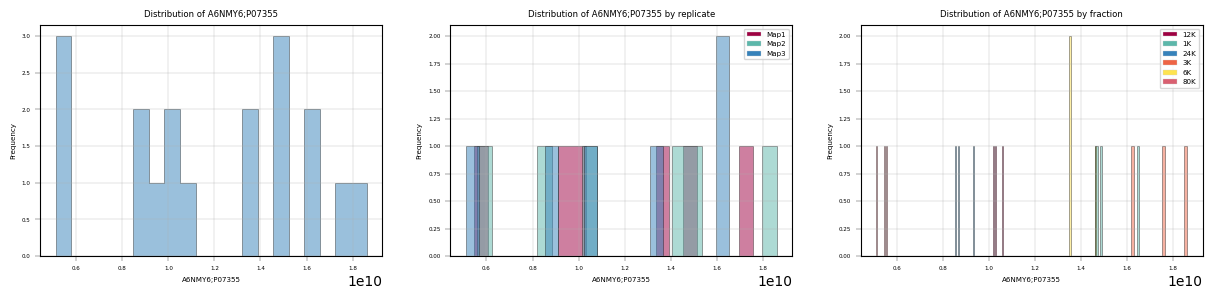

In [6]:
# Apply the AxisManager to make axes iterable and apply consistent AlphaTools styling.
# Axes can also be accessed directly by indexing the axm object.
fig, axs = create_figure(nrows=1, ncols=3, figsize=(15, 3))

common_params = {
    "bins": 20,
    "legend": "auto",
    "hist_kwargs": {"alpha": 0.5, "histtype": "stepfilled", "linewidth": 0.5, "edgecolor": "black"},
}
axm = AxisManager(axs)

# Plot.histogram handles adata natively. Columns from the data and metadata are accessible
# Focus on the distribution of cell types in gene_1
ax = axm.next()

protein_id = "A6NMY6;P07355"
Plots.histogram(data=adata, value_column=protein_id, ax=ax, **common_params)
label(ax, protein_id, "Frequency", f"Distribution of {protein_id}")

# Focus on the distribution of cell types in gene_1
ax = axm.next()
color_column = "replicate"
Plots.histogram(data=adata, value_column=protein_id, color_column=color_column, ax=ax, **common_params)
label(ax, protein_id, "Frequency", f"Distribution of {protein_id} by {color_column}")

# Focus on the distribution of cell types in gene_1
ax = axm.next()
color_column = "fraction"
Plots.histogram(data=adata, value_column=protein_id, color_column=color_column, ax=ax, **common_params)
label(ax, protein_id, "Frequency", f"Distribution of {protein_id} by {color_column}")